<a href="https://colab.research.google.com/github/AIRJK/CPA-Attack/blob/master/TEST_CPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TEST
CPA


流式输出内容被截断，只能显示最后 5000 行内容。
key: 246 Time: 2502
(0.0007659760100764947, 0.9489107346597043)
key: 246 Time: 2503
(0.0042322328968164005, 0.7233146335860583)
key: 246 Time: 2504
(-0.0016505103773049308, 0.8901874357976084)
key: 246 Time: 2505
(0.012257959089416346, 0.30516043027461676)
key: 246 Time: 2506
(-0.022125405797211242, 0.06416376380903192)
key: 246 Time: 2507
(-0.014427773765885148, 0.22744700995065825)
key: 246 Time: 2508
(-0.0038509740560515814, 0.7473471968366021)
key: 246 Time: 2509
(-0.008163129162068763, 0.49469165122696823)
key: 246 Time: 2510
(-6.779277841214131e-05, 0.995475270496967)
key: 246 Time: 2511
(-0.022195704626874965, 0.06332211239343376)
key: 246 Time: 2512
(-0.002627374691164682, 0.8260401132073871)
key: 246 Time: 2513
(0.009160346727731193, 0.44350448139073995)
key: 246 Time: 2514
(0.016440766144062646, 0.16901351677709392)
key: 246 Time: 2515
(-0.01275790126133819, 0.2858565184239121)
key: 246 Time: 2516
(-0.01611660659434882, 0.17757515812145236)
key: 246

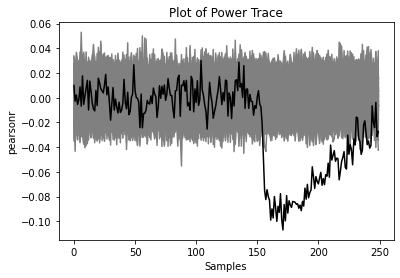

In [ ]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time
start = time.process_time()

power = np.loadtxt("drive/My Drive/DeepLearning/RAWDATE/unprotect/7000_traces.txt", dtype=np.int)
cipher = np.loadtxt("drive/My Drive/DeepLearning/RAWDATE/unprotect/7000_ciphers.txt", dtype=np.int)

num = int(input("请输入攻击第几个字节：\n"))

sbox_inv = np.array([
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D
], dtype=np.uint8)

indexmap = [0, 5, 10, 15, 4, 9, 14, 3, 8, 13, 2, 7, 12, 1, 6, 11]

HD = np.empty((7000, 256), dtype=np.uint8)
corr = np.empty((256, 250), dtype=np.double)
x = []
y = []

def hamming_weight(x):
    return bin(x).count("1")
ki = indexmap[num]
for g in range(256):
    for l in range(7000):
        HD[l][g] = hamming_weight(sbox_inv[cipher[l][num] ^ g] ^ cipher[l][ki])
    # for z in range(7000):
    #     x.append(HW[z][g])

for i in range(256):
    for j in range(2500, 2750):
        for k in range(7000):
            x.append(HD[k][i])
            y.append(power[k][j])
        corr[i][j-2500]=stats.pearsonr(x,y)[0]
        print("key: %d Time: %d"%(i, j))
        print(stats.pearsonr(x, y))
        # print(x)
        # print(y)
        x.clear()
        y.clear()
# index = np.where(corr==np.max(abs(corr)))
value = np.argmin(corr)
key = int(value/250)
lp = value%250+2500
# print(index)
# lp = index[1][0]+750

print("密钥的第%d字节为: 0x%02x"%(num, key))
print("最佳泄露位置为：%d"%lp)

end = time.process_time()

print("执行时长："+str(end-start))

for i in range(256):
    if (i != key):

        plt.plot(corr[i], color='grey')


plt.plot(corr[key], color = 'black')
plt.xlabel("Samples")
plt.ylabel("pearsonr")
plt.title("Plot of Power Trace")
plt.show()
